### Partial Differential equations (PDEs)

* multiple indpendent variables

#### Classification
* General 2nd order quasi-linear: 
$$A(x,y) \frac{\partial^2 u}{\partial x^2}+2B(x,y) \frac{\partial^2 u}{\partial x \partial y}+C(x,y) \frac{\partial^2 u}{\partial y^2} = F(x,y,u, \frac{\partial u}{\partial x}, \frac{\partial u}{\partial y})$$

Notation: 
- Use $x,y,z, \text{and } t$ as independent variables (with $u,v,w$ as independent parametric variables)
- Designate dependent variable as $u,v,w,\psi$, or $\omega$
- Use subscripts (sometimes preceded by a comma) as shorthand for partial derivatives
- Equation above abbreviates to:
$$A(x,y) \, u_{xx}+2B(x,y) \, u_{xy}+C(x,y) \, u_{yy} = F(x,y,u, u_x, u_y)$$
- __Constant coefficients__ $\implies$ PDE further simplifies to:
$$A  u_{xx}+2B  u_{xy}+C  u_{yy} = F(x,y,u, u_x, u_y)$$

**Characteristic solution:** $u = f(k x + y)$.

 With chain rule: $$u_x = k f', u_y = f'$$
 Plug into PDE: $$A k^2 f'' +2 B k f'' + C f'' = 0$$
 Results in quadratic euqation: $$A k^2 + 2 B k + C = 0$$

 Major distinction involves whether quadratic has real roots

 Existance of real characteristics determined by the **discriminant:** $B^2 - A C$




|   Type        |     Discriminant Value      |   Classic Example   |      Classic Equation    |    Normal Form Equation   |
| -------- | :------------------: | :--------: | :-------------: | :--------------: |
| Hyperbolic     |  $B^2-A C>0$  | Wave |  $u_{tt} = c^2 u_{xx}$     | $u_{vw} = f_1$ |
| Parabolic      |  $B^2-A C=0$  | Heat |  $u_{t} = c^2 u_{xx}$     | $u_{ww} = f_2$ |
| Elliptic      |  $B^2-A C<0$  | Laplace |  $u_{xx} + u_{yy} = 0$     | $u_{vv}+u_{ww} = f_3$ |

Different classes of equations have different properties that require choosing appropriate numerical methods.

#### Laplace's equation
* Gravitation, electrostatics, fluid flow, many thigns with potential
* Model for diffusion: temperatute, chemical concentrations, etc

$$ \nabla^2 u = \frac{\partial^2u}{\partial x^2} + \frac{\partial^2u}{\partial y^2} = 0 \text{ on } x \in [0,L_x]; \; y \in [0,L_y]$$

with boundary conditions:

$$u(0,y)=u(L_x,y)=u(x,0)=0, \; u(x,L_y) = U$$

To solve:

1. Discritize domain into n+2 points to account for boundary conditions
2. Replace derivatives in PDE with central difference approximations
3. This creates 5 point laplace stencil for classic stencil computation!

$$ \nabla^2 u = \frac{\partial ^2 u}{\partial x^2} + \frac{\partial^2u}{\partial y^2} \rightarrow u_{i-1,j}+u_{i+1,j}+u_{i,j-1} + u_{i,j+1} -4u_{i,j} = 0$$

4. Solve for each point in grid by accounting for all neighbors

$$u_{i,j} = \frac{1}{4} (u_{i-1,j} + u_{i+1,j} +u_{i,j-1} +u_{i,j+1} )$$

5. Repeat until results converge!



[25.   12.5   7.81  5.47  4.69  4.03  3.49  3.05  2.7   2.4   2.16  1.95
  1.83  1.71  1.61  1.52  1.43  1.35  1.28  1.21  1.15  1.09  1.03  0.99
  0.95  0.92  0.89  0.85  0.83  0.8   0.77  0.74  0.72  0.7   0.67  0.65
  0.63  0.61  0.59  0.58  0.56  0.55  0.53  0.52  0.51  0.5   0.48  0.47
  0.46  0.45  0.44  0.43  0.42  0.41  0.4   0.39  0.38  0.37  0.36  0.36]


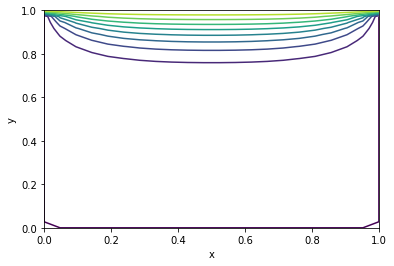

In [6]:
import numpy as np
from simple_plot import *

def mean_update(u):
    '''
    update 2D array with non-boundary elements replaced 
    by average of 4 nearest neighbors (on Cartesian grid)
    
    Args:
        u: 2D numpy array of floats
        
    Returns:
        u_new: numpy array with same shape as u
    '''
    #insert code here
    nx,ny = u.shape
    #u_new = np.zeros([nx,ny])
    u_new = np.copy(u)
    for i in range(1,nx-1):
        for j in range(1,ny-1):
            u_new[i,j]=(u[i-1,j]+u[i+1,j]+
                        u[i,j-1]+u[i,j+1])/4.
    return u_new

#intialize discretization
Lx,Ly = 1,1
nx,ny = 35,20
x = np.linspace(0,Lx,nx + 2) #linspace across full domain including boundaries
y = np.linspace(0,Ly,ny + 2) #linspace across full domaindx = Lx/(nx+1) #spacing between nodes
dx,dy = Lx/(nx+1), Ly/(ny+1) #spacing between nodes
x_in, y_in = x[1:-1], y[-1:1] #coords of interior points

#intialize the 2D array
u = np.zeros([nx+2,ny+2]) #include boundary points
top_val = 100
u[0] = 100 #impose BCs
# termination parameters
tol = 1e-2
max_iter = 60
du = np.zeros(max_iter) # 1D array for change values
for k in range(max_iter):
    u_new = mean_update(u)
    du_max = np.max(np.abs(u-u_new))
    du[k] = du_max
    u = u_new
    if du_max < tol:
        break
np.set_printoptions(precision=2)
# print(u)
print(du)

arraycontourplot(1-x,y, u, levels=np.linspace(0,100,10),
    titlestring='', filled=False)

In [ ]:
### PDE Forms



In [ ]:
### Laplace direct solve

**Method:**

1. Collect discritized equations for the full grid
2. Construct one big system of equations for full grid of values (linear PDE -> linear system)
3. Recast problem into traditional $A x = b$
    * Will need to flatten $nxn$ array into 1D array

A is stencil matrix: 
x is matrix of unknowns of independent variable
b is matrix of non-homogeneous boundary values


**notes for this section not finished**






In [ ]:
### Fourier Transform

### PDEs with both time and spacial coordinates

**Example application:**

$\displaystyle{ \frac{\partial u}{\partial t} = \kappa \frac{\partial^2 u}{\partial x^2} \text{ or } u_t = \kappa u_{xx}}$

Heat equation:

* Parabolic 2nd order linear PDE
* Models 1D heat condution
* ICs: $u(x,0) = u_0(x)$ 
* BCs(both in ice): $u(0,t)=u(1,t)=0$

**Steps:**

1. Discritize space and time: $x_i = i \Delta x \; ; \; t_k = k \Delta t$
2. Apply ICs at initial time: $u(x,0) = U_0(x)$
3. Estimate derivatives with finite difference scheme (1st/2nd/etc)

$\displaystyle{\frac{\partial^2 u}{\partial x^2}=\frac{1}{\Delta x^2}(u_{i-1}-2 u_i + u_{i+1})}$

4. Step forward (using euler/RK45/etc)to compute values: $u(x_i, t_1)$

$\displaystyle{ \frac{\partial u}{\partial t} = \frac{1}{\Delta t} (u_{k+1}-u_k)}$

5. Repeat to compute values for the remaining times: $u(x_i, t_k)$

$\displaystyle{u_{i,k+1}= u_{i,k}+\frac{\kappa \Delta t}{\Delta x^2}(u_{i-1,k}-2 u_{i,k} + u_{i+1,k})}$

$i$ tracks space, $k$ tracks time

In [1]:
# loop over the line of nodes corresponding to next time
# function for step 4 above
def forward_euler_heatstep(u0, dx, dt):
    '''
    compute the array produced by a forward euler step
    
    Args:
        u0: 1D numpy array of current values
        dx: float spacing between nodes on the spatial grid
        dt: float time step
        
    Returns:
        v: 1D numpy array of updated values
    '''
    v = np.copy(u0)
    n = v.shape[0]
    lam = dt/(dx**2)
    for i in range(1,n-1):
        v[i]+=lam*(u0[i-1]-2*u0[i]+u0[i+1])
    return v

# equivalent "matrix" version constructing array to 
# represent discretized spatial derivative
def forward_euler_matrix_heatstep(u0, dx, dt):
    '''
    compute the array produced by a forward euler step
    
    Args:
        u0: 1D numpy array of current values
        dx: float spacing between nodes on the spatial grid
        dt: float time step
        
    Returns:
        v: 1D numpy array of updated values
    '''
    v = np.copy(u0)
    n = u0.shape[0]
    lam = dt/(dx**2)
    A = diags([1,-2,1],[-1,0,1], shape=[n,n])
    v += lam*A.dot(u0)
    v[0],v[-1] = 0, 0 # impose boundary conditions
    return v

# solver computes/saves solutions over multiple lines of nodes
# for successive values of t
def forward_euler_heatsolve(x, t, ICs):
    '''
    compute solution of heat equation by forward euler/central diff.
    
    Args:
        x: 1D numpy array of uniformly spaced grid coordinates corr. to linspace(xmin, xmax, nx+1)
        t: 1D numpy array of uniformly spaced time values corr. to linspace(tmin, tmax, nt+1)
        ICs: 1D numpy array of initial values
        
    Returns:
        u: 2D numpy array of solution values
    '''
    nx = x.shape[0]
    if nx != ICs.shape[0]:
        print("Length of initial condition array does not match spatial gridsize.")
        return
    nt = t.shape[0]
    dx = (x[-1]-x[0])/(nx-1)
    dt = (t[-1]-t[0])/(nt-1)
    u = np.zeros([nt,nx])
    u[0] = ICs
    for k in range(1,nt):
        #swithc comment status of the next 2 lines to use the matrix implementation
        u[k] = forward_euler_heatstep(u[k-1], dx, dt)
        #u[k] = forward_euler_matrix_heatstep(u[k-1], dx, dt)
    return u


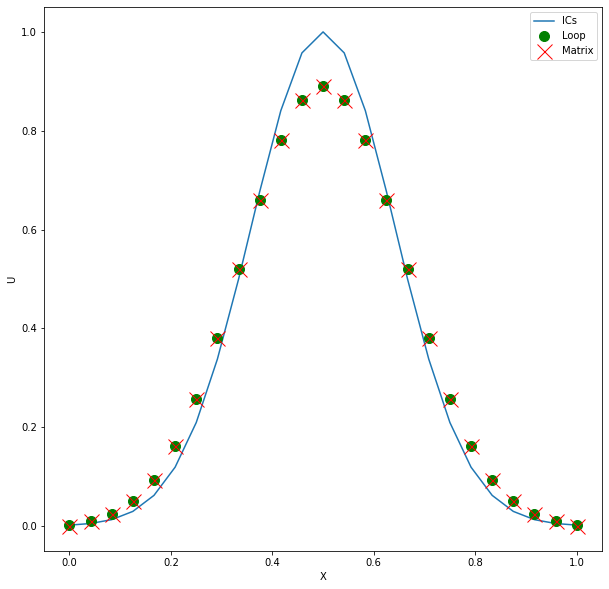

None

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as LA
from scipy.sparse import diags
np.set_printoptions(precision=2)
from simple_plot import *

xmin, xmax, nx = 0, 1, 25
x = np.linspace(xmin, xmax,nx) #compute the coordinates of the grid points
dx = (xmax-xmin)/(nx-1) #spacing between grid points
tmin, tmax, nt = 0, 0.02, 10
t = np.linspace(tmin, tmax, nt)
dt = (tmax-tmin)/(nt-1) #time step
u = np.zeros([nt,nx]) #initialize array of zeros to store u(x,t)
ICs = np.exp(-((x-0.5)/0.2)**2) #Gaussian initial conditions
u[0] = ICs

#check that loop and array implementations agree
u = forward_euler_heatstep(ICs, dx, dt)
v = forward_euler_matrix_heatstep(ICs, dx, dt)

plt.figure(figsize=(10,10)) 
plt.plot(x,ICs.T, label="ICs")
plt.plot(x,u.T,'go', ms=10, label="Loop")
plt.plot(x,v.T,'rx', ms=15,  label="Matrix")
plt.xlabel("X")
plt.ylabel("U")
plt.legend()
display(plt.show())

# This prints temp distribution after tmax = .02 (calculated after 10 steps)

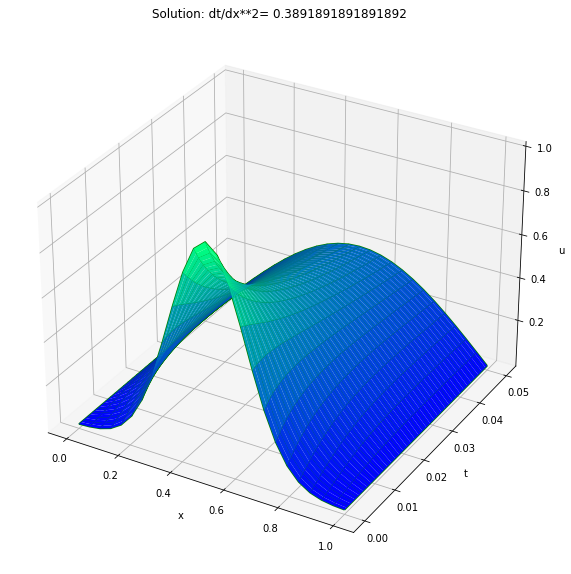

In [7]:
# repeat of initialization up to t = .05 in 75 steps

xmin, xmax, nx = 0, 1, 25
x = np.linspace(xmin, xmax,nx) #compute the coordinates of the grid points
dx = (xmax-xmin)/(nx-1) #spacing between grid points

tmin, tmax, nt = 0, 0.05, 75

t = np.linspace(tmin, tmax, nt)
dt = (tmax-tmin)/(nt-1) #time step
u = np.zeros([nt,nx]) #initialize array of zeros to store u(x,t)
ICs = np.exp(-((x-0.5)/0.2)**2) #Gaussian initial conditions
u[0] = ICs
#call the method of lines solver
sol = forward_euler_heatsolve(x, t, ICs)

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection="3d")

X, Y = np.meshgrid(x, t)
Z = sol #z_function(X, Y)

ax.plot_wireframe(X, Y, Z, color='green')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='winter', edgecolor='none')
ax.set_title('Solution: dt/dx**2= '+str(dt/dx**2))
plt.show()

### Time stepping: Explicit vs Implicit methods:

**Another example:**

$\displaystyle{\qquad \frac{\partial u}{\partial t} = c \frac{\partial u}{\partial x}}$

One-way wave equation:
* Analytic solutions in the form: $u(x,t) = f(x+ct)$

**Steps:**

1. Similiar approach as before, but finite difference scheme is for 1st derivative


In [8]:
# function to compute values on line of nodes at next t
def forward_euler_wave1way_step(u0, dx, dt, c):
    '''
    compute the array produced by a forward euler step from u
    '''
    v = np.copy(u0)
    n = v.shape[0]
    lam = c*dt/(2*dx)
    for i in range(1,n-1):
        v[i]+=lam*(-u0[i-1] + u0[i+1])
    return v

# solver to compute/save over multiple lines
def forward_euler_wave1way_solve(x, t, ICs, c):
    '''
    compute solution of heat equation by forward euler/central diff.
    '''
    nx = x.shape[0]
    nt = t.shape[0]
    dx = (x[-1]-x[0])/(nx-1)
    dt = (t[-1]-t[0])/(nt-1)
    u = np.zeros([nt,nx])
    u[0] = ICs
    for k in range(1,nt):
        u[k] = forward_euler_wave1way_step(u[k-1], dx, dt, c)
    return u


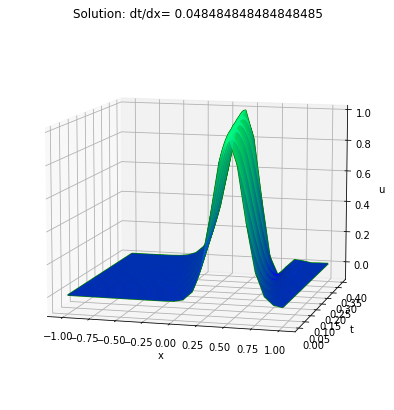

In [11]:
#initialization including wave speed
c = 1.
xmin, xmax, nx = -1, 1, 25
x = np.linspace(xmin, xmax,nx) #compute the coordinates of the grid points
dx = (xmax-xmin)/(nx-1) #spacing between grid points

tmin, tmax, nt = 0, 0.4, 100

t = np.linspace(tmin, tmax, nt)
dt = (tmax-tmin)/(nt-1) #time step
u = np.zeros([nt,nx]) #initialize array of zeros to store u(x,t)
ICs = np.exp(-((x-0.5)/0.2)**2) #Gaussian initial conditions
u[0] = ICs

# solve here
sol = forward_euler_wave1way_solve(x, t, ICs, c)

fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection="3d")

X, Y = np.meshgrid(x, t)
Z = Z = np.clip(sol,-2,2) 

ax.plot_wireframe(X, Y, Z, color='green')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='winter', edgecolor='none')
ax.set_title("Solution: dt/dx= "+str(dt/dx));
ax.view_init(10,-75) #elevation and azimuth (rotation around z-axis) for viewing
plt.show()



This calculation is limited:

1. Forward euler truction error $\approx O(\Delta t)$
2. Central difference truncation error $\approx O(\Delta t^2)$

Can be improved with better finite difference schemes